In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
import random
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from plotnine import *

In [2]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [3]:
test.shape

(1459, 80)

In [4]:
train.shape

(1460, 81)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test.Alley.unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [8]:
test[test.Alley.isna()].shape

(1352, 80)

In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
missing_train = pd.concat([train.isnull().sum(), 100 * train.isnull().mean()], axis=1)
missing_train.columns=['count','%']
missing_train[missing_train["count"]>0].sort_values(by='count')

,count,%
Electrical,1,0.068493
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtFinType1,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
GarageCond,81,5.547945
GarageQual,81,5.547945


In [12]:
missing_test = pd.concat([test.isnull().sum(), 100 * test.isnull().mean()], axis=1)
missing_test.columns=['count','%']
missing_test[missing_test["count"]>0].sort_values(by='count')

,count,%
TotalBsmtSF,1,0.068540
GarageArea,1,0.068540
GarageCars,1,0.068540
KitchenQual,1,0.068540
BsmtUnfSF,1,0.068540
BsmtFinSF2,1,0.068540
BsmtFinSF1,1,0.068540
SaleType,1,0.068540
Exterior1st,1,0.068540
Exterior2nd,1,0.068540


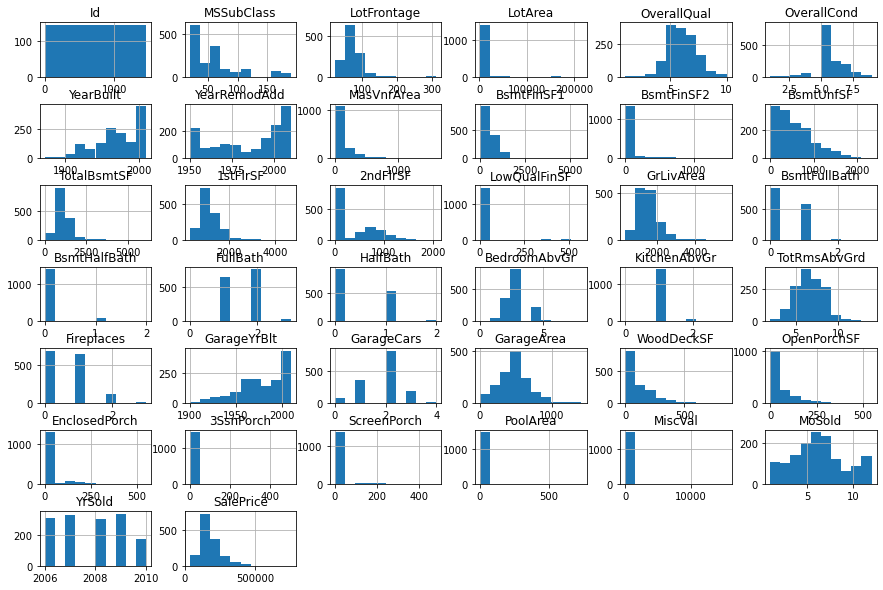

In [14]:
#View distribution of the features
train.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [15]:
train[train.GarageArea>1000].GarageArea

178     1166
270     1053
317     1025
581     1390
664     1134
803     1020
825     1220
1061    1248
1087    1043
1142    1052
1190    1356
1228    1052
1268    1014
1298    1418
1417    1069
Name: GarageArea, dtype: int64

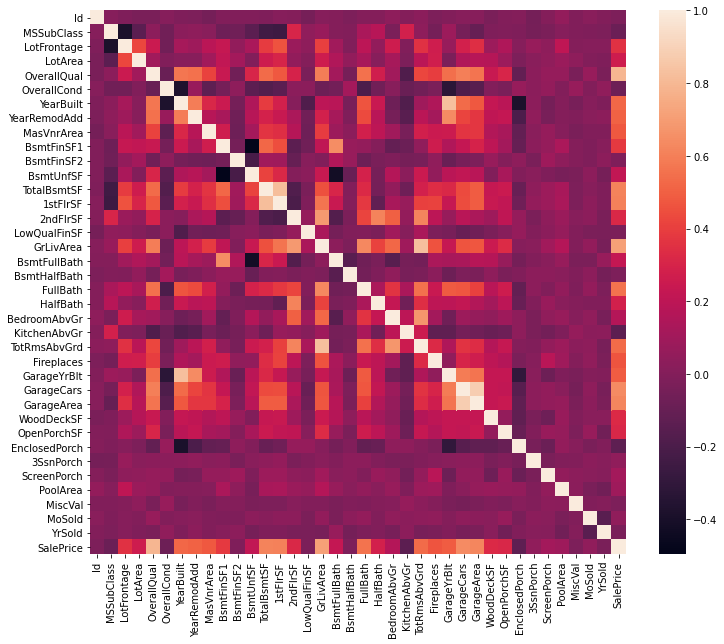

In [16]:
plt.subplots(figsize=(12,10))
sns.heatmap(train.corr());

In [17]:
def scatterplots(dataframe,columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'SalePrice', data=dataframe, alpha=0.5)
        ax.set(xlabel=col, ylabel='Sale Price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

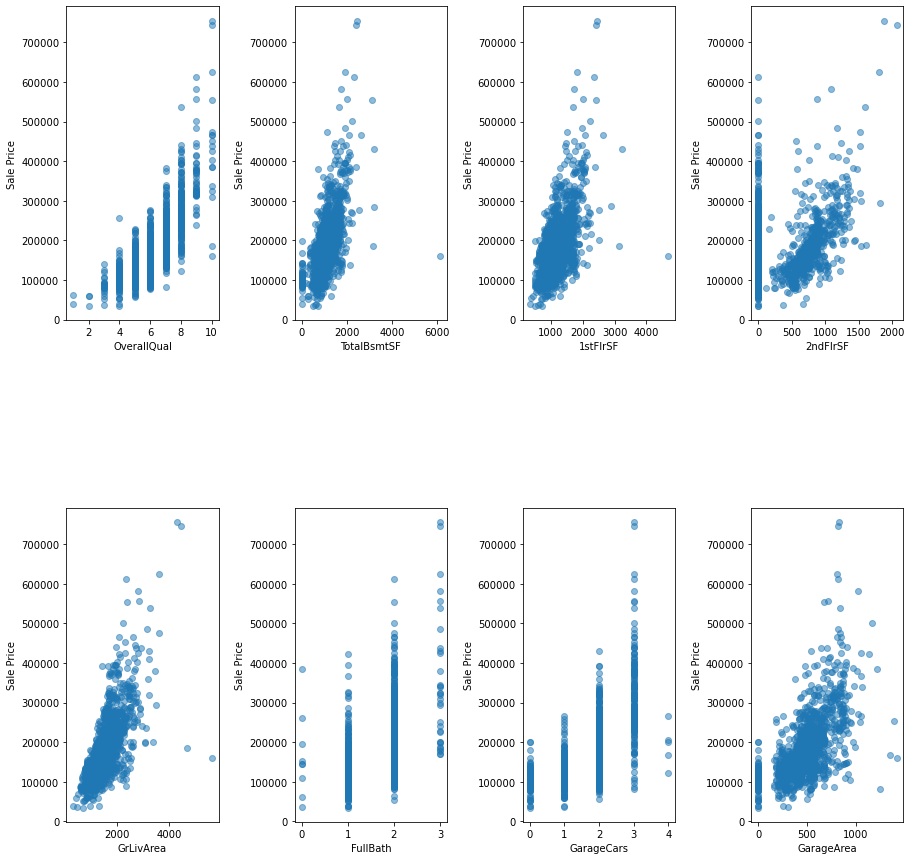

In [18]:
features=["OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","GarageCars","GarageArea"]
scatterplots(train,features, ncol=4, figsize=(15, 15))

In [19]:
train.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [20]:
train[train.PoolQC.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [21]:
train[train.PoolQC.notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [22]:
nopool=train[train.PoolQC.isna()]

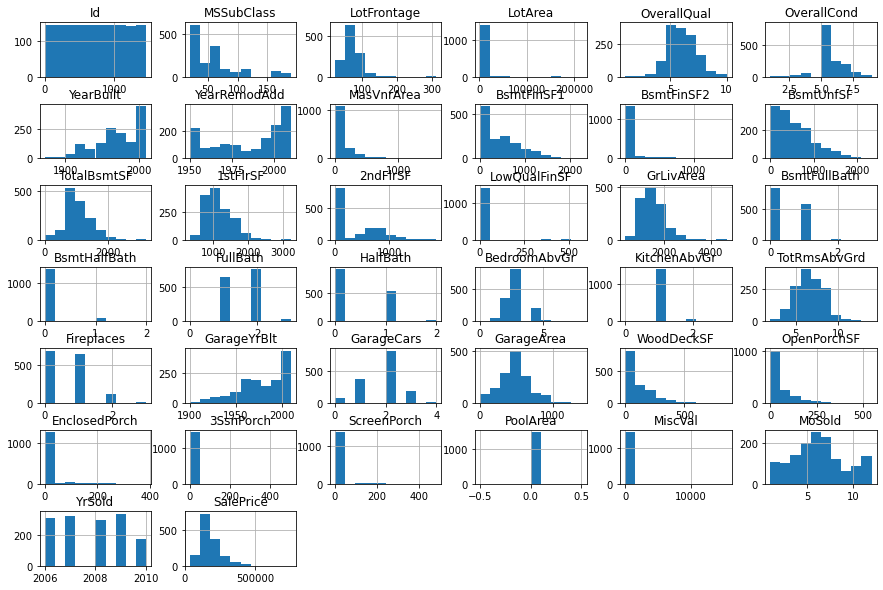

In [23]:
#View distribution of the features
nopool.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

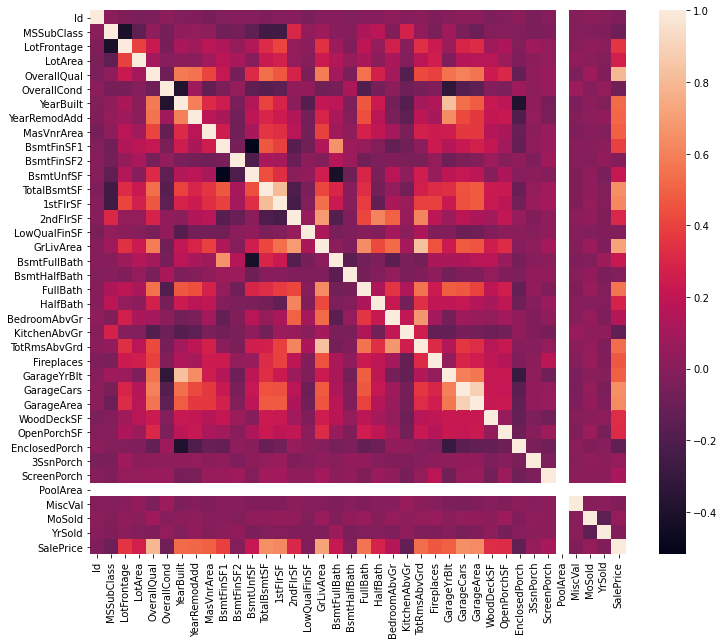

In [24]:
plt.subplots(figsize=(12,10))
sns.heatmap(nopool.corr());

In [25]:
pool=train[train.PoolQC.notnull()]

In [26]:
pool.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1067.571429,62.142857,146.833333,23047.285714,7.571429,5.428571,1973.857143,1987.714286,154.142857,1535.857143,...,205.571429,104.857143,78.857143,0.0,62.857143,575.428571,285.714286,4.857143,2006.714286,288138.571429
std,433.712600,20.788046,92.460622,18798.332246,1.812654,0.975900,28.474717,14.682351,291.819824,1921.171555,...,197.505154,117.529328,208.636389,0.0,166.304368,89.840335,755.928946,3.078342,0.951190,206071.850935
min,198.000000,20.000000,76.000000,9880.000000,6.000000,4.000000,1918.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,480.000000,0.000000,1.000000,2006.000000,160000.000000
25%,991.000000,60.000000,78.500000,12881.500000,6.000000,5.000000,1970.000000,1977.500000,0.000000,592.500000,...,85.500000,8.000000,0.000000,0.0,0.000000,515.500000,0.000000,2.000000,2006.000000,176000.000000
50%,1183.000000,60.000000,120.000000,16692.000000,7.000000,5.000000,1977.000000,1990.000000,0.000000,790.000000,...,203.000000,78.000000,0.000000,0.0,0.000000,555.000000,0.000000,7.000000,2006.000000,235000.000000
75%,1343.000000,77.500000,170.500000,22554.500000,9.000000,6.000000,1987.000000,1997.500000,141.500000,1566.000000,...,239.500000,174.000000,0.000000,0.0,0.000000,612.000000,0.000000,7.000000,2007.500000,262485.000000
max,1424.000000,80.000000,313.000000,63887.000000,10.000000,7.000000,2008.000000,2008.000000,796.000000,5644.000000,...,586.000000,292.000000,552.000000,0.0,440.000000,738.000000,2000.000000,8.000000,2008.000000,745000.000000


There are only 7 entries in the data with a pool. That would not be enough to split the data into houses with a pool and those without. One thing to do is to see if any model has larger error in its predictions for the houses with a pool. If the errors there are significantly larger, that needs to be taken into account

In [27]:
train[train.LotFrontage>250]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [28]:
train[(train.LotFrontage>150) & (train.LotFrontage<250)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
231,232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000
1107,1108,60,RL,168.0,23257,Pave,NaN,IR3,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,274725
1127,1128,20,RL,182.0,14572,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Family,259000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1211,1212,50,RL,152.0,12134,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,164000
1337,1338,30,RM,153.0,4118,Pave,Grvl,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,52500


In [29]:
train.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [30]:
train[train.Fence.notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1437,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,120500
1438,1439,20,RM,90.0,7407,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,149700
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000


In [31]:
fencetrain=train[train.Fence.notnull()]
nofencetrain=train[train.Fence.isna()]

In [32]:
fencetrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,281.000000,281.000000,228.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,...,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,724.740214,47.900356,71.741228,9565.103203,5.562278,5.964413,1957.181495,1977.932384,65.359431,430.754448,...,103.487544,38.476868,30.715302,3.857651,15.985765,12.626335,72.064057,6.338078,2007.925267,152912.007117
std,438.140258,33.790912,19.585319,3172.118328,1.037098,1.264409,24.055868,18.550290,126.956189,360.745409,...,145.520988,69.699511,73.596565,28.034310,62.823333,86.417917,297.207256,2.785731,1.332868,62113.736323
min,6.000000,20.000000,21.000000,1300.000000,3.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,308.000000,20.000000,60.000000,7804.000000,5.000000,5.000000,1945.000000,1964.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,123000.000000
50%,742.000000,50.000000,70.000000,9100.000000,5.000000,6.000000,1963.000000,1977.000000,0.000000,438.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,141500.000000
75%,1120.000000,60.000000,80.000000,10594.000000,6.000000,7.000000,1974.000000,1995.000000,90.000000,663.000000,...,192.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,166000.000000
max,1458.000000,190.000000,174.000000,25419.000000,10.000000,9.000000,2004.000000,2009.000000,1047.000000,2096.000000,...,728.000000,547.000000,552.000000,320.000000,480.000000,738.000000,2500.000000,12.000000,2010.000000,745000.000000


In [33]:
nofencetrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1179.000000,1179.000000,973.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1171.000000,1179.000000,...,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,731.872774,59.041561,69.653649,10743.659881,6.227311,5.482612,1974.625106,1986.518236,112.882152,446.710772,...,92.041561,48.610687,19.865988,3.302799,14.840543,0.407125,36.678541,6.318066,2007.789652,187596.837998
std,417.753586,43.827558,25.252231,10987.768403,1.424107,1.053087,30.555751,20.782534,190.694165,476.094891,...,119.994019,65.288041,57.589163,29.625433,53.964052,13.979265,532.555017,2.684883,1.326187,81656.497075
min,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,373.500000,20.000000,58.000000,7417.500000,5.000000,5.000000,1955.000000,1969.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132750.000000
50%,728.000000,60.000000,68.000000,9550.000000,6.000000,5.000000,1978.000000,1996.000000,0.000000,370.000000,...,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,173000.000000
75%,1091.500000,70.000000,80.000000,11840.000000,7.000000,6.000000,2003.000000,2005.000000,178.000000,728.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,224700.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,502.000000,386.000000,508.000000,396.000000,480.000000,15500.000000,12.000000,2010.000000,755000.000000


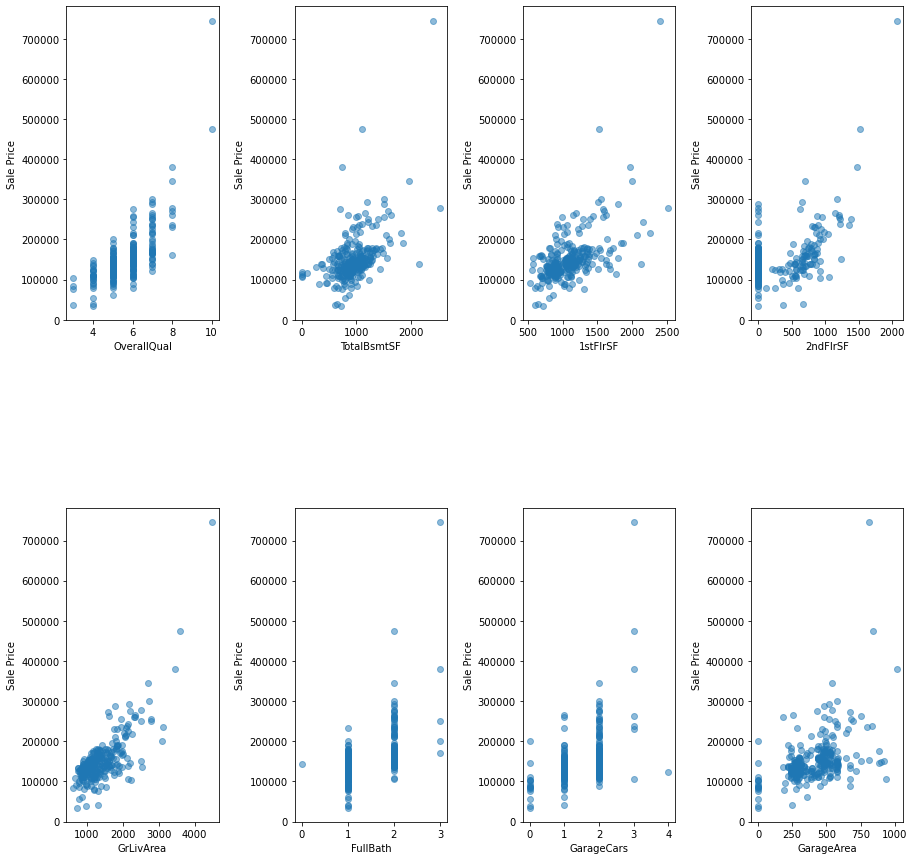

In [34]:
features=["OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","GarageCars","GarageArea"]
scatterplots(fencetrain,features, ncol=4, figsize=(15, 15))

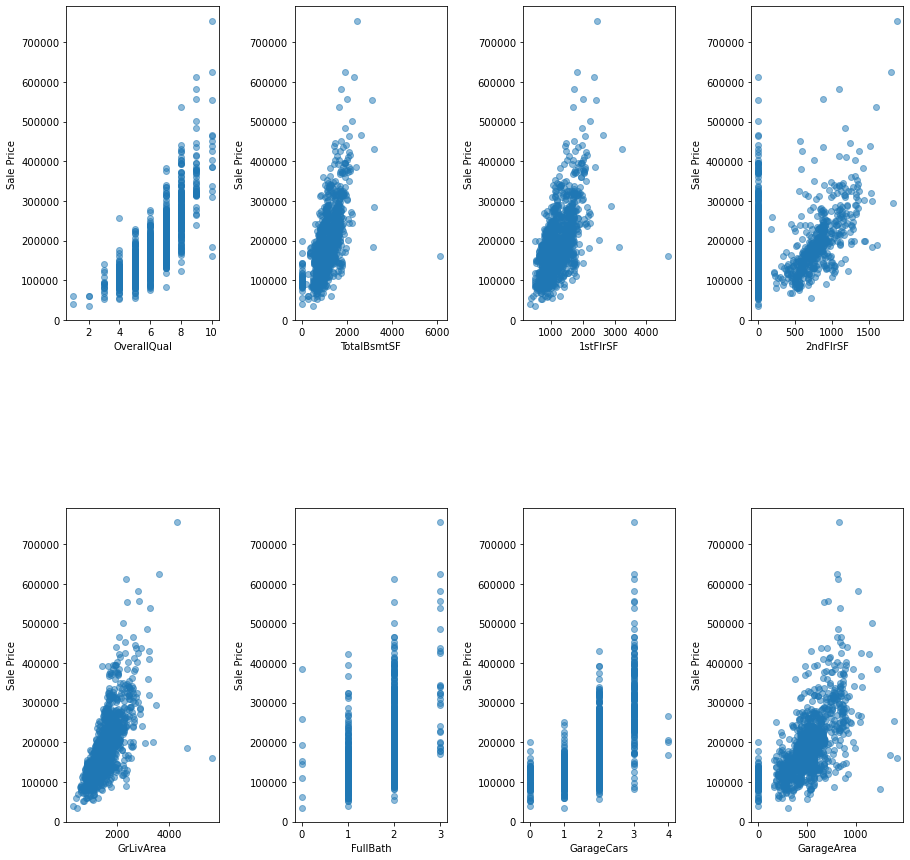

In [35]:
features=["OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","GarageCars","GarageArea"]
scatterplots(nofencetrain,features, ncol=4, figsize=(15, 15))

There are a significant number of houses with a fence. There is a gap in sale price between houses with no fence and houses with a fence. It may be worth developing separate models for each. We could potentially model them as a whole and see if the errors in houses with a fence have a noticeable pattern or just split them into two groups and then use the models separately to predict a price for the test data by splitting the test data into separate groups as well

In [36]:
garagetrain=train[train.GarageCars>0]

In [37]:
train.GarageCars=train.GarageCars.dropna(0)

In [38]:
nogaragetrain=train[train.GarageCars==0]

In [39]:
garagetrain.shape

(1379, 81)

In [40]:
nogaragetrain.shape

(81, 81)

Only 81 homes had no garage. This is too small to sample separately

In [41]:
train.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [42]:
train[train.Alley.notnull()].shape

(91, 81)

Only 91 homes had an alley accessible. This is too small to sample separately

In [43]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [44]:
train.EnclosedPorch.unique()

array([  0, 272, 228, 205, 176,  87, 172, 102,  37, 144,  64, 114, 202,
       128, 156,  44,  77, 192, 140, 180, 183,  39, 184,  40, 552,  30,
       126,  96,  60, 150, 120, 112, 252,  52, 224, 234, 244, 268, 137,
        24, 108, 294, 177, 218, 242,  91, 160, 130, 169, 105,  34, 248,
       236,  32,  80, 115, 291, 116, 158, 210,  36, 200,  84, 148, 136,
       240,  54, 100, 189, 293, 164, 216, 239,  67,  90,  56, 129,  98,
       143,  70, 386, 154, 185, 134, 196, 264, 275, 230, 254,  68, 194,
       318,  48,  94, 138, 226, 174,  19, 170, 220, 214, 280, 190, 330,
       208, 145, 259,  81,  42, 123, 162, 286, 168,  20, 301, 198, 221,
       212,  50,  99], dtype=int64)

In [45]:
train['3SsnPorch'].unique()

array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 144, 182,
       162,  23, 216,  96, 153, 290, 304], dtype=int64)

In [46]:
train['ScreenPorch'].unique()

array([  0, 176, 198, 291, 252,  99, 184, 168, 130, 142, 192, 410, 224,
       266, 170, 154, 153, 144, 128, 259, 160, 271, 234, 374, 185, 182,
        90, 396, 140, 276, 180, 161, 145, 200, 122,  95, 120,  60, 126,
       189, 260, 147, 385, 287, 156, 100, 216, 210, 197, 204, 225, 152,
       175, 312, 222, 265, 322, 190, 233,  63,  53, 143, 273, 288, 263,
        80, 163, 116, 480, 178, 440, 155, 220, 119, 165,  40], dtype=int64)

In [47]:
#Create column with total porcharea combining all types of porch in the data
train['TotalPorch']=train['3SsnPorch']+train['ScreenPorch']+train['EnclosedPorch']

In [48]:
train.TotalPorch.unique()

array([  0, 272, 320, 228, 205, 176,  87, 172, 198, 102, 407,  37, 144,
        64, 114, 291, 202, 128, 252, 156,  44,  99,  77, 184, 168, 192,
       130, 140, 180, 183, 142,  39,  40, 410, 224, 266, 552,  30, 170,
       126, 508, 154,  96,  60, 150, 120, 238, 112, 153, 245, 196,  52,
       259, 160, 271, 234, 244, 268, 137,  24, 108, 294, 374, 177, 218,
       185, 182,  90, 242,  91, 396, 169, 105,  34, 248, 236, 276,  32,
        80, 115, 161, 116, 158, 145, 210,  36, 200,  84, 148, 122,  95,
       136, 240, 174, 189, 260, 100, 147, 385, 293, 164, 287, 216, 239,
        67,  56, 129,  98, 143, 386, 134, 197, 204, 264, 275, 225, 152,
       230, 254,  68, 194, 175, 312, 222, 265, 162, 322, 232, 190,  23,
       318, 233,  63,  48,  94, 138, 165, 226,  19, 220, 342, 214, 280,
       273, 288, 263, 330, 208, 163,  81, 123, 286, 480, 290,  20, 301,
       178, 221, 440, 212,  50, 155, 119, 304], dtype=int64)

In [49]:
train[train.TotalPorch==0].shape

(1119, 82)

In [50]:
train[train.TotalPorch>0].shape

(341, 82)

In [51]:
porchtrain=train[train.TotalPorch>0]
noporchtrain=train[train.TotalPorch==0]

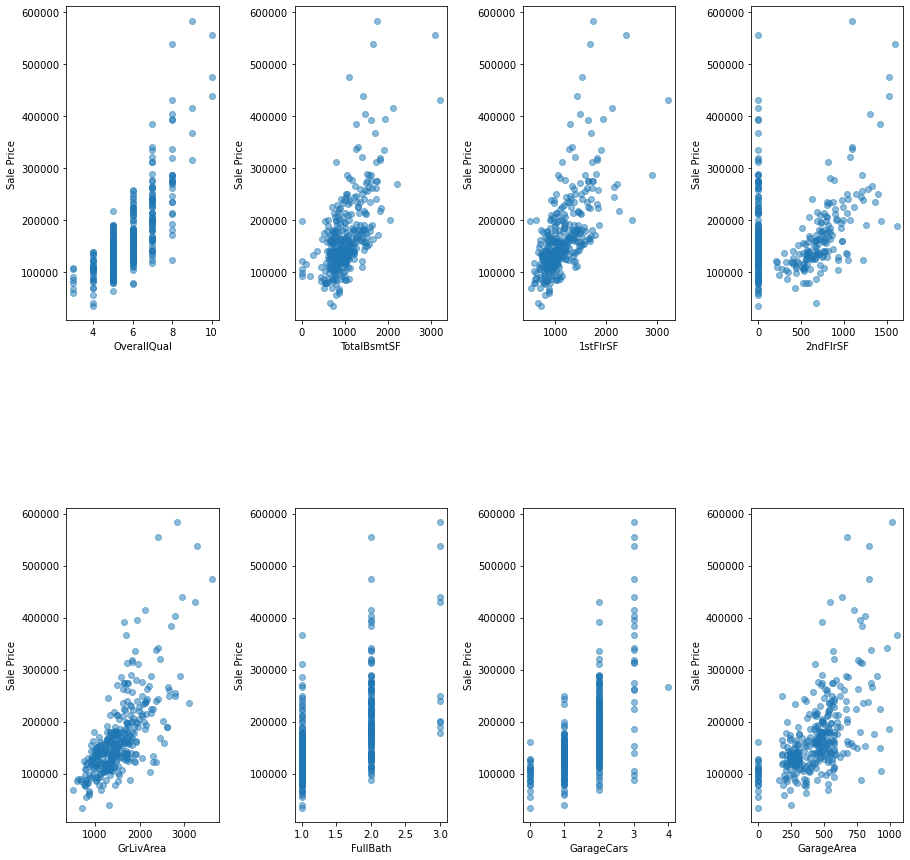

In [52]:
features=["OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","GarageCars","GarageArea"]
scatterplots(porchtrain,features, ncol=4, figsize=(15, 15))

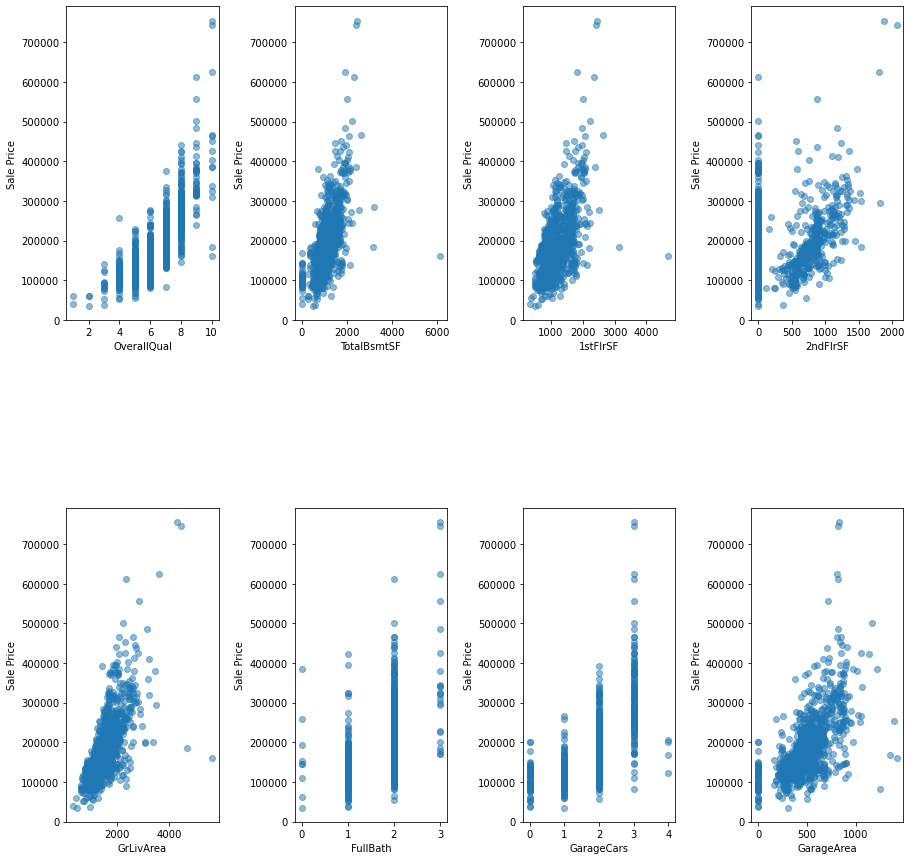

In [55]:
features=["OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","GarageCars","GarageArea"]
scatterplots(noporchtrain,features, ncol=4, figsize=(15, 15))

In [56]:
porchtrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalPorch
count,341.000000,341.000000,285.000000,341.000000,341.000000,341.000000,341.000000,341.00000,340.000000,341.000000,...,341.000000,341.000000,341.00000,341.000000,341.000000,341.00000,341.000000,341.000000,341.000000,341.000000
mean,714.724340,52.873900,69.968421,10533.739003,5.859238,5.824047,1949.633431,1977.40176,81.655882,391.715543,...,38.507331,93.997067,14.59824,64.483871,3.023460,63.98827,6.357771,2007.856305,169888.648094,173.079179
std,424.270516,36.144464,21.098421,5874.471775,1.242913,1.273535,31.289595,21.99398,173.678871,415.607944,...,71.154290,96.115357,59.36730,100.719604,39.421844,497.76907,2.769770,1.312787,78319.391320,81.200095
min,4.000000,20.000000,30.000000,3182.000000,3.000000,2.000000,1872.000000,1950.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000,2006.000000,34900.000000,19.000000
25%,360.000000,20.000000,57.000000,7500.000000,5.000000,5.000000,1922.000000,1950.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,5.000000,2007.000000,122000.000000,119.000000
50%,682.000000,50.000000,65.000000,9600.000000,6.000000,6.000000,1953.000000,1978.00000,0.000000,315.000000,...,0.000000,91.000000,0.00000,0.000000,0.000000,0.00000,6.000000,2008.000000,153000.000000,168.000000
75%,1095.000000,70.000000,80.000000,11700.000000,7.000000,7.000000,1970.000000,1999.00000,108.000000,644.000000,...,55.000000,164.000000,0.00000,144.000000,0.000000,0.00000,8.000000,2009.000000,194500.000000,216.000000
max,1459.000000,190.000000,174.000000,57200.000000,10.000000,9.000000,2008.000000,2009.00000,1600.000000,1767.000000,...,547.000000,552.000000,508.00000,480.000000,519.000000,8300.00000,12.000000,2010.000000,582933.000000,552.000000


In [ ]:
noporchtrain.describe()

There are a significant number of houses with a porch as a feature. As with the fence it could be worth investigating separately. We can't break up into too many  but it's possible that separating the houses by fencing and/or porches to see if it makes a large difference in the model.

C:\Users\ronsp\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 259 rows containing missing values.


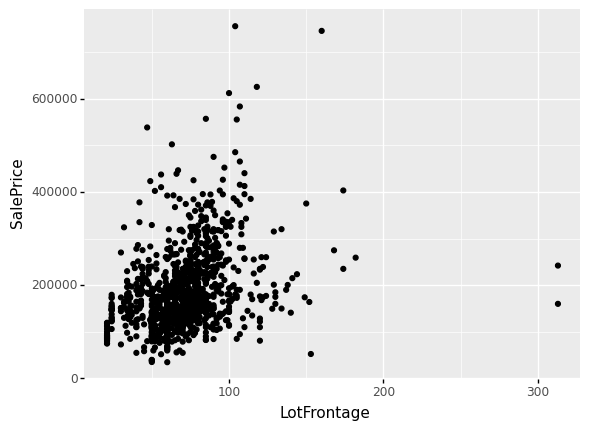

<ggplot: (143844274195)>

In [57]:
ggplot(train, aes(x = 'LotFrontage', y = 'SalePrice')) + geom_point()

In [58]:
train[train.LotFrontage.isna()].shape

(259, 82)

In [59]:
train[train.LotFrontage.isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalPorch
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,228
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,144000,176
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000,176
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,700,3,2010,WD,Normal,149000,0
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000,0


In [60]:
fencetrain[fencetrain.LotFrontage.isna()].shape

(53, 81)

In [ ]:
nofencetrain[nofencetrain.LotFrontage.isna()].shape

In [61]:
train[train.LotArea.isna()].shape

(0, 82)

In [67]:
train.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [69]:
train.Fence=train.Fence.fillna(0)

In [70]:
train.Fence.head()

0    0
1    0
2    0
3    0
4    0
Name: Fence, dtype: object

In [71]:
train['fenced']=train.Fence.apply(lambda x : 'Not Fenced' if x==0 else 'Fenced')

In [73]:
train.fenced.head(20)

0     Not Fenced
1     Not Fenced
2     Not Fenced
3     Not Fenced
4     Not Fenced
5         Fenced
6     Not Fenced
7     Not Fenced
8     Not Fenced
9     Not Fenced
10    Not Fenced
11    Not Fenced
12    Not Fenced
13    Not Fenced
14        Fenced
15        Fenced
16    Not Fenced
17    Not Fenced
18    Not Fenced
19        Fenced
Name: fenced, dtype: object

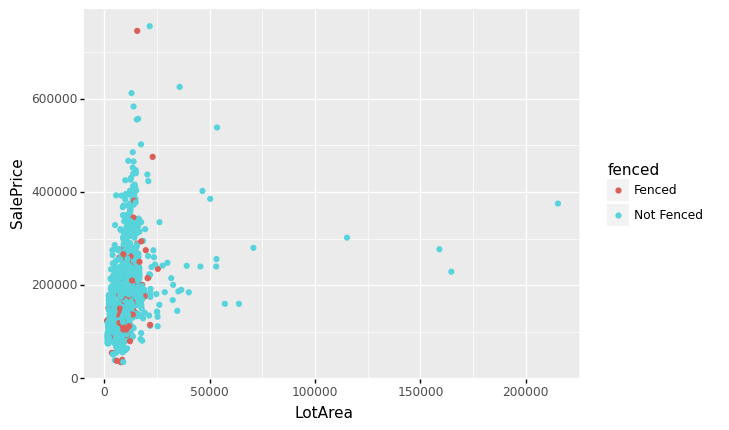

<ggplot: (143844720071)>

In [74]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='fenced')) + geom_point()

In [75]:
train['hasporch']=train.TotalPorch.apply(lambda x: 'Porch' if x > 0 else 'No Porch')                     

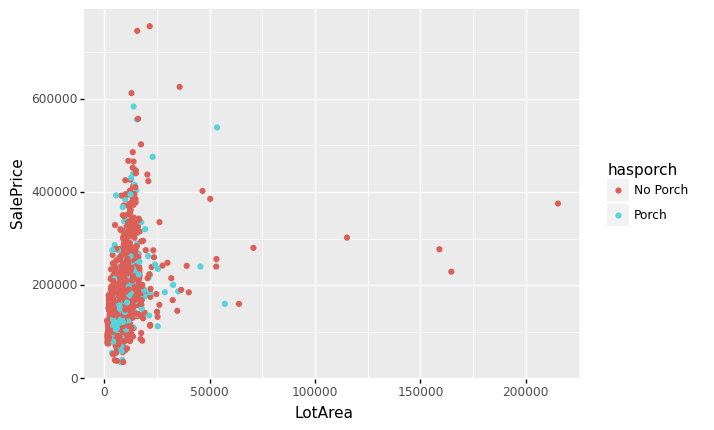

<ggplot: (143844100642)>

In [76]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='hasporch')) + geom_point()

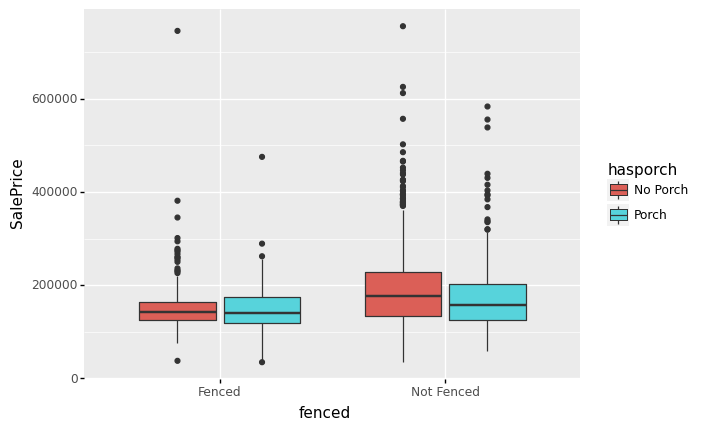

<ggplot: (143844152275)>

In [77]:
ggplot(train, aes(x = 'fenced', y = 'SalePrice', fill = 'hasporch')) + geom_boxplot() ggplot(train, aes(x = 'fenced', y = 'SalePrice', fill = 'hasporch')) + geom_boxplot() 


It is hard to tell at this point what difference fences and porches make as categorical data. For fenced in yards the median was nearly identical for porch or no porch while porches had a slightly wider variation. Homes without neither a fence nor a porch had the highest median price but it doesn't appear enough to draw a conclusion that either feature makes a significant difference to the price alone. It might be worth looking to see if the other features that might affect price have a similar distribution.

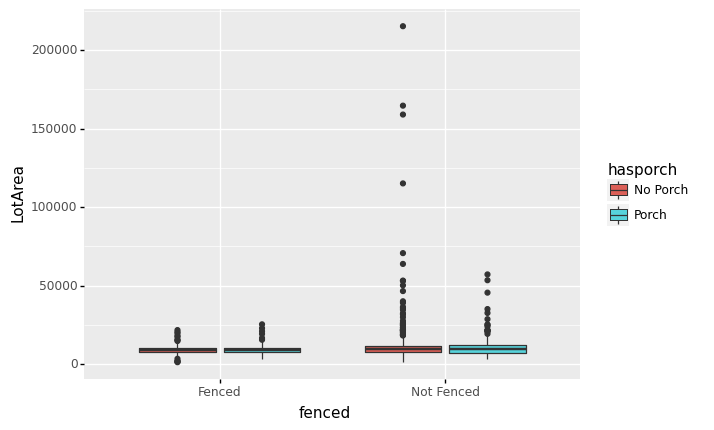

<ggplot: (143844284666)>

In [78]:
ggplot(train, aes(x = 'fenced', y = 'LotArea', fill = 'hasporch')) + geom_boxplot() 

It's hard to see the real differences because of the outliers. We can limit the y-axis to exclude those to see if we can get a clearer picture.

C:\Users\ronsp\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_boxplot : Removed 4 rows containing non-finite values.


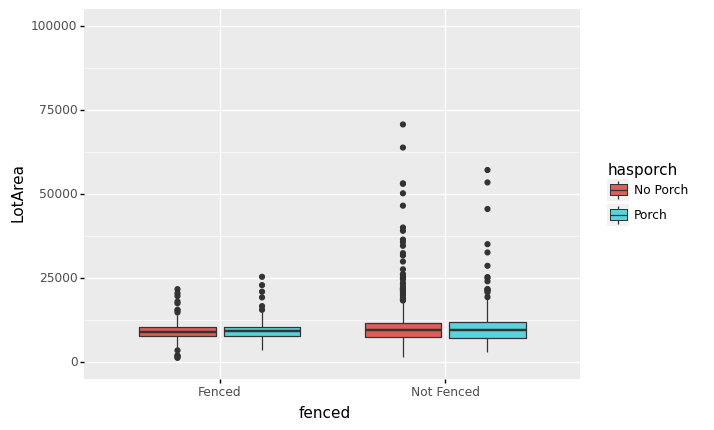

<ggplot: (143844212520)>

In [84]:
#repeat last plot bu limiting lot area to 100,000
ggplot(train, aes(x = 'fenced', y = 'LotArea', fill = 'hasporch')) + geom_boxplot() +scale_y_continuous(limits=(0,100000))

Lot Area seems to be distributed similarly across all combinations. The larger groups have more variation and the fenced in yard with no porch has some low values. It is still starting to appear that it could be okay to treat all the houses as one group without separation. We can do a little more exploratory analysis on some other features to see.

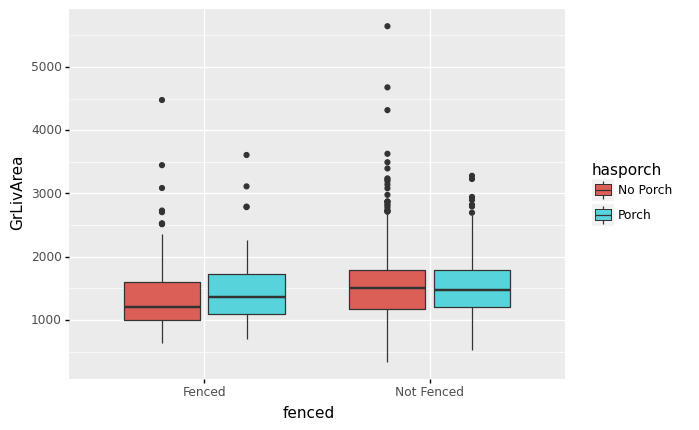

<ggplot: (143842726331)>

In [86]:
ggplot(train, aes(x = 'fenced', y = 'GrLivArea', fill = 'hasporch')) + geom_boxplot() 

Again there doesn't seem to be anything indicating that either having a fence or having a porch is really related to the feature. We really can start to see that splitting into fenced/not fenced or having a porch or not doesn't appear to be worthwhile. We can double check later to see if any model fails a certain way more for these categories.